In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

### Single variable example

        0        1
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233
               0          1
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000




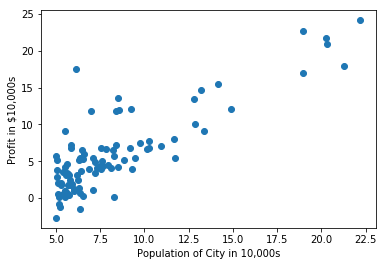

In [291]:
#data = np.loadtxt(open('ex1data1.txt', 'rb'), delimiter=',', skiprows=0)
df = pd.read_csv("ex1data1.txt", header=None)
#df = pd.DataFrame(data)
df.rename(columns={"0":"Population", "1":"Profit"})
print(df.head())
print(df.describe())
print ("\n")

data = df.values
m = len(data)

X = data[:,0][:,np.newaxis]
y = data[:,1][:,np.newaxis]

plt.scatter(X, y )
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")
plt.show()

X = np.hstack((np.ones((m,1)),X))
n = X.shape[1]

#### Hypothesis 
$$ h_\theta=\theta^TX=\theta_0 + \theta_1x_1+...+\theta_nx_n$$

#### Cost Function
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$$

In [292]:
def costFunction(X,y,theta):
    m = len(X)
    h = X @ theta
    J = (1/(2*m))*np.sum((h - y)**2)
    return J

#### Vectorized cost function 
$$ J(\theta)=1/2m(X\theta-\vec{y})^T(X\theta-\vec{y}) $$

In [293]:
def costFunction(X, y, theta):
    m = len(X)
    h = X @ theta
    J = (1/(2*m)) * (h - y).T @ (h - y)
    return np.asscalar(J)

####  Gradient Descent
$$ \theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} $$


In [294]:
def gradientDescent(X,y,theta,alpha,num_iters):
    history = list()
    m = len(X)
    for i in range(num_iters):
        h = X @ theta
        errors = h - y
        delta = (alpha * (1/m)) * (X.transpose() @ errors)
        theta = theta - delta
        J = costFunction(X,y,theta)
        history.append(J)
    return theta, history

In [295]:
theta = np.zeros((n,1))

J = costFunction(X,y,theta)
print("With theta = [0 ; 0] Cost computed = %.2f" % J, "\n")
print("Expected cost value (approx) 32.07\n")

theta = np.array([-1,2]).reshape(2,1)
J = costFunction(X,y,theta)

print("With theta = [-1 ; 2] Cost computed = %.2f" % J, "\n")
print("Expected cost value (approx) 54.24\n")

With theta = [0 ; 0] Cost computed = 32.07 

Expected cost value (approx) 32.07

With theta = [-1 ; 2] Cost computed = 54.24 

Expected cost value (approx) 54.24



Theta found by gradient descent: 
 [[-3.63029144]
 [ 1.16636235]] 

Expected theta values (approx): 
 -3.6303
  1.1664

For population = 35,000, we predict a profit of 4519.767868

For population = 70,000, we predict a profit of 45342.450129



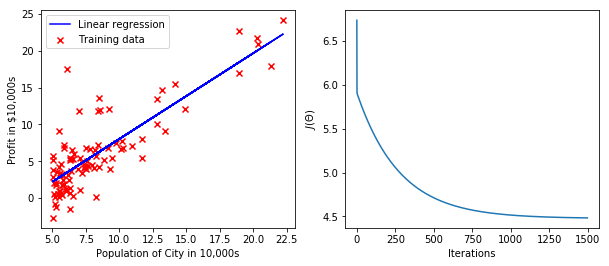

In [296]:
theta = np.zeros((n,1))
iterations = 1500
alpha = 0.01
theta,history = gradientDescent(X,y,theta,alpha, iterations)
#plt.plot(range(iterations),history)

print("Theta found by gradient descent: \n", theta, "\n")
print("Expected theta values (approx): \n -3.6303\n  1.1664\n");

fig, [ax1,ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax1.scatter(X[:,1], y, color="red", marker="x")
ax1.plot(X[:,1], X @ theta, color="blue")
ax1.legend(['Linear regression', 'Training data'])
ax1.set_xlabel("Population of City in 10,000s")
ax1.set_ylabel("Profit in $10,000s")

ax2.plot(range(iterations), np.array(history)[:, np.newaxis])
ax2.set_xlabel("Iterations")
ax2.set_ylabel("$J(\Theta)$")

predict1 = [1, 3.5] @ theta;
print("For population = 35,000, we predict a profit of %f\n" % (predict1*10000))
predict2 = [1, 7] @ theta;
print("For population = 70,000, we predict a profit of %f\n" % (predict2*10000))


Visualizing J(theta_0, theta_1) ...



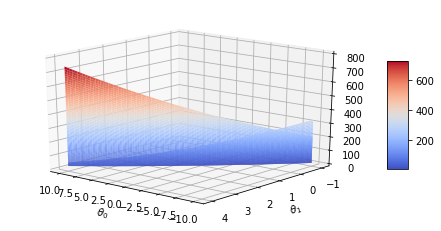

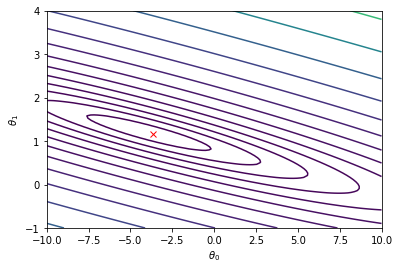

In [276]:

print("Visualizing J(theta_0, theta_1) ...\n")
theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-1,4,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i][j] = costFunction(X, y, t)
        
fig = plt.figure(figsize=(8,4))
ax = fig.gca(projection='3d')
#ax.plot_wireframe(theta0_vals, theta1_vals, J_vals, rstride=5, cstride=5)
ax.view_init(20,130)
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals.T,rstride=1, cstride=1,cmap=plt.cm.coolwarm, linewidth=0, antialiased=True)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
ax.set_zlim(0, 800)
plt.show()

plt.contour(theta0_vals, theta1_vals, J_vals.T,levels=np.logspace(-2,3,30))
plt.plot(theta[0,0], theta[1,0],'rx')
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.show()


#### visualizing convergence for different alpha values

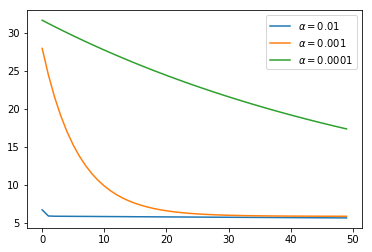

In [300]:
_, J1 = gradientDescent(X,y,np.zeros((n,1)), 0.01, 50)
_, J2 = gradientDescent(X,y,np.zeros((n,1)), 0.001, 50)
_, J3 = gradientDescent(X,y,np.zeros((n,1)), 0.0001, 50)
fig, ax = plt.subplots()
ax.plot(range(50), J1)
ax.plot(range(50), J2)
ax.plot(range(50), J3)
ax.legend([r"$\alpha=0.01$", r"$\alpha=0.001$", r"$\alpha=0.0001$"])
plt.show()

### With scikit learn

Coefficients: 1.19
Mean squared error: 8.95
Variance score: 0.70


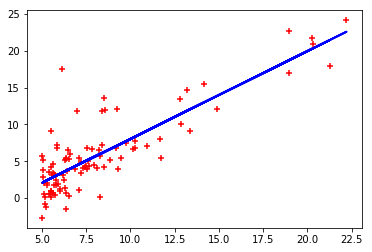

In [267]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

X = data[:,0,np.newaxis]
y = data[:,1,np.newaxis]
regr = linear_model.LinearRegression()
regr.fit(X, y)
pred = regr.predict(X)

# The coefficients
print('Coefficients: %.2f' % regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, pred))
plt.scatter(X, y,  color="red", marker="+")
plt.plot(X, pred, color='blue', linewidth=2)
plt.show()


#### slicing data into train and test samples

Coefficients: 1.19
Mean squared error: 6.59
Variance score: 0.20


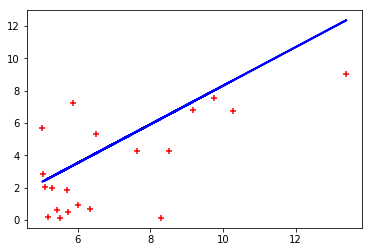

In [265]:
X = data[:,0,np.newaxis]
y = data[:,1,np.newaxis]

X_train = X[:-20]
y_train = y[:-20]
X_test = X[-20:]
y_test = y[-20:]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: %.2f' % regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
plt.scatter(X_test, y_test,  color="red", marker="+")
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()

### Mulitvariate example

In [249]:
df = pd.read_csv("ex1data2.txt", header=None)
print(df.head(), "\n\n", df.describe())

X = df.values[:,:2]
y = df.values[:,2,np.newaxis]
X = np.hstack((np.ones((m,2)),X))
n = X.shape[1]
m = len(X)
theta = np.zeros((n,1))
# iterations = 1500
# alpha = 0.01

      0  1       2
0  2104  3  399900
1  1600  3  329900
2  2400  3  369000
3  1416  2  232000
4  3000  4  539900 

                  0          1              2
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


ValueError: all the input array dimensions except for the concatenation axis must match exactly

### With numpy minimize